In [4]:
"""
读取数据
"""
import pandas as pd
processed_news_path = "output/processed_news.txt"
with open(processed_news_path, "r", encoding="utf-8") as file:
    documents = file.readlines()
documents = [doc.strip() for doc in documents if doc.strip()]
print(f"总文档数：{len(documents)}")

word_freq_path = "output/word_frequency.txt"
word_freq = {}
with open(word_freq_path, "r", encoding="utf-8") as file:
    for line in file:
        if ":" in line:
            word, freq = line.strip().split(":")
        else:
            parts = line.strip().split(",")
            word, freq = parts[0], parts[1] if len(parts) > 1 else (parts[0], 1)
        word_freq[word.strip()] = int(freq.strip())
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=["Word", "Frequency"])
print(word_freq_df.head())

总文档数：7996
  Word  Frequency
0    中       4157
1    年       3769
2   孩子       2865
3   学校       2505
4   学生       2420


In [5]:
"""
TF-IDF
"""
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
tfidf_dict = dict(zip(feature_names, tfidf_scores))
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print("TF-IDF前10词语：")
for word, score in sorted_tfidf[:10]:
    print(f"{word}: {score:.4f}")

TF-IDF前10词语：
文本: 1981.7618
gpe: 735.2290
cardinal: 585.2808
ns: 512.0635
vn: 501.6026
date: 480.3876
nr: 457.1358
person: 438.6664
org: 364.4757
实体识别: 276.0265


In [6]:
"""
关键词提取
"""
top_n = 100
top_keywords = sorted_tfidf[:top_n]
keywords_dict = dict(top_keywords)
print("Top 10 Keywords:")
for word, score in top_keywords[:10]:
    print(f"{word}: {score:.4f}")

keywords_output_path = "output/keywords.txt"
with open(keywords_output_path, "w", encoding="utf-8") as file:
    for word, score in top_keywords:
        file.write(f"{word}: {score:.6f}\n")
print(f"关键词及其权重已保存至 {keywords_output_path}")

Top 10 Keywords:
文本: 1981.7618
gpe: 735.2290
cardinal: 585.2808
ns: 512.0635
vn: 501.6026
date: 480.3876
nr: 457.1358
person: 438.6664
org: 364.4757
实体识别: 276.0265
关键词及其权重已保存至 output/keywords.txt


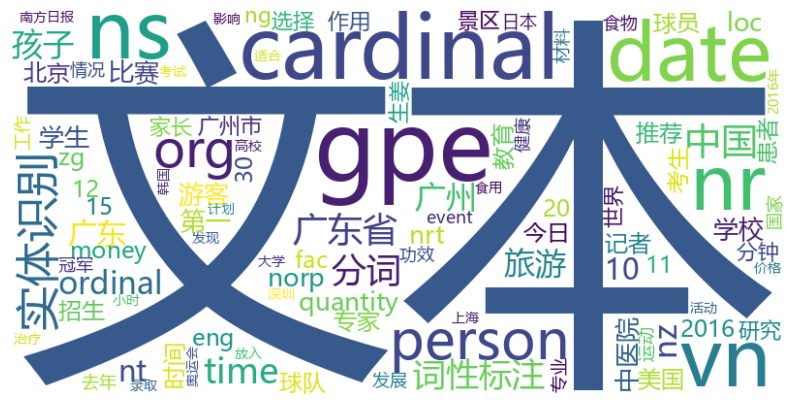

In [7]:
"""
词云图生成
"""
import os
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

background_image_path = "background.jpg"
if os.path.exists(background_image_path):
    background_image = np.array(Image.open(background_image_path))
    mask = background_image
    wc = WordCloud(
        font_path="msyh.ttc",
        background_color="white",
        max_words=top_n,
        mask=mask,
        max_font_size=200,
        random_state=42,
        scale=2,
    )
    image_colors = ImageColorGenerator(background_image)
else:
    wc = WordCloud(
        font_path="msyh.ttc",
        background_color="white",
        max_words=top_n,
        max_font_size=200,
        random_state=42,
        scale=2,
    )

wc.generate_from_frequencies(keywords_dict)

if os.path.exists(background_image_path):
    plt.figure(figsize=(10, 10))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
else:
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_output_path = "output/wordcloud.png"
wc.to_file(wordcloud_output_path)